# Abstract

describe high-level aims of the analysis and an overview of the findings. No more than 1 paragraph.

First, we'll load the palmer penguins dataset:

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(url)

We'll take a quick peek at how the data looks:

In [3]:
train.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


# Data Preparation

To format the data into what we want, we'll have to do a few things. First, we'll get rid of the columns that won't help us predict the species of the penguin, in this case: "studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", and "Region". 



In [4]:
train = train.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)

The "Sex" column includes a third sex titled "." in the data that we will remove. We'll also remove any rows with missing data.

In [5]:
train = train[train["Sex"] != "."]
train = train.dropna()

Lastly, we'll convert all our categorical data into numerical data. For our target variable, "Species", we'll use a label encoder. This will assign each label a whole number. For the other columns, we will use one-hot encoding using `pandas.get_dummies` on our dataframe. This will create a new column for each unique value in the column. Our function `prepare_data` will return X_train, the training data without the target variable, and y_train, the training target variable.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = 1*pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

Now our data looks like this:

In [7]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,0,1,0,1,0,1,1,0
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,0,1,0,1,0,1,0,1
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,1,0,0,1,0,1,0,1
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,1,0,0,1,0,1,1,0
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,0,1,0,1,0,1,0,1


We can see it's all numerical data now, with many categories containing binary data. Time to explore!

## Explore

2 interesting visualizations and 1 summary table visualization and table should:

1. Include axis labels and legends
2. help you draw conclusions about what features you are going to try using for your model
be accompanied by a discussion of what you learned and how you will use it in modeling. most figures and tables are worth at least one short paragraph of discussion.

Explain the following table:

In [8]:
X_train.groupby(["Sex_MALE", "Sex_FEMALE"]).aggregate(["mean"])

,,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Sex_MALE,Sex_FEMALE,,,,,,,,,,,,
0,1,42.562121,16.362121,198.189394,3887.500000,8.679350,-25.637225,0.492424,0.386364,0.121212,1.0,0.128788,0.871212
1,0,45.621774,17.950806,204.209677,4545.362903,8.815592,-25.680676,0.483871,0.370968,0.145161,1.0,0.088710,0.911290


Explain the following visualization:

<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

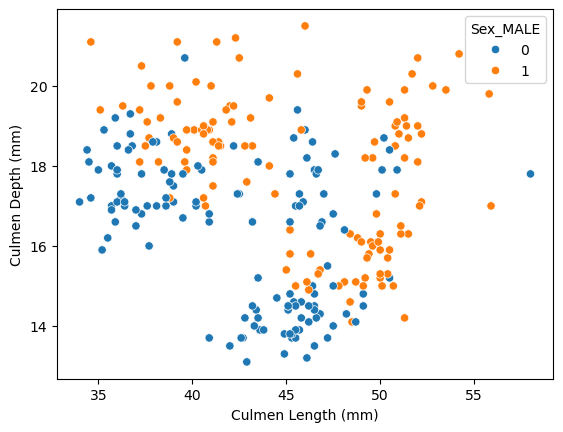

In [9]:
import seaborn as sns

categories = ["Body Mass (g)", "Culmen Length (mm)"]
sns.scatterplot(X_train, x = "Culmen Length (mm)", y = "Culmen Depth (mm)", hue = "Sex_MALE")


The following visualization shows the correlation between different pairs of variables. Values close to 1 or -1 indicate more linear relationships. 
Given that there are three penguin species, the most helpful visual is one that shows three distinct clumps. This would then likely not be a linear correlation, and so values that are closer to zero may show clumped data. We can see some of the lowest correlations are Culmen Depth vs Culmen Length, Body Mass vs Culmen Depth, and Body Mass vs Culmen Length.

<Axes: >

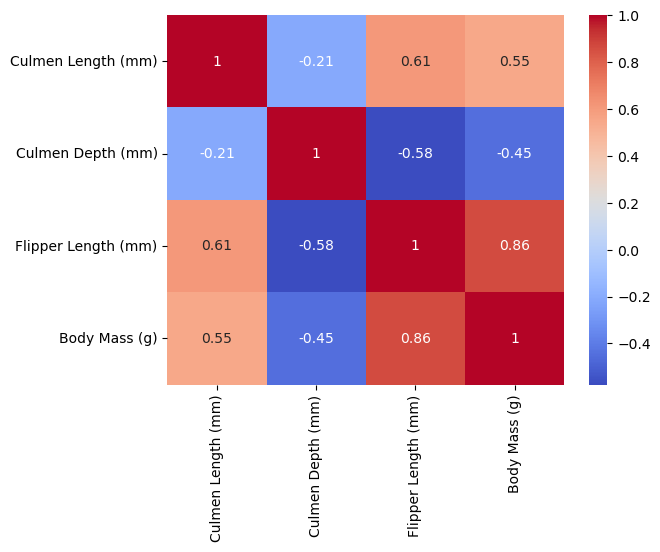

In [10]:
corr = X_train[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


The following scatterplot shows the relationship between **Culmen Depth (mm)** on the X-axis and **Body Mass (g)** on the Y-axis. The scatterplot is colored by the sex of the penguin, with purple representing female and orange representing male. This scatterplot shows two distinct clusters of penguins, one in the upper left and the other bottom right. Since we have color-coded by gender, we can see that the clusters are not separated by gender! Perhaps the are separated by Species, in which case this relationship will be very important when creating a classification model. It's likely that one of the penguin species is represented by the cluster in the upper left, and the other two are represented by the cluster in the bottom right. I make this assumption given that the lower right cluster is roughly twice the size of the other.

<Axes: xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

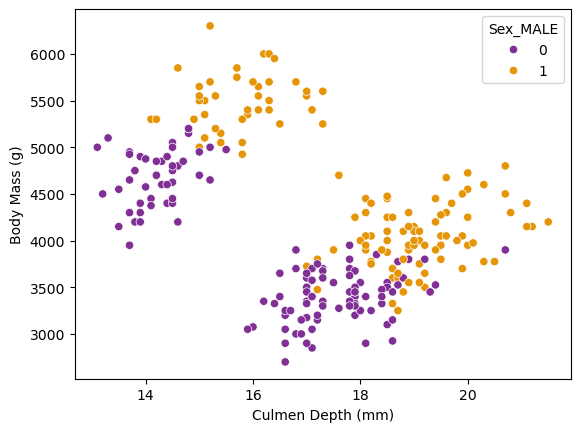

In [11]:
sns.scatterplot(X_train, x="Culmen Depth (mm)", y="Body Mass (g)", hue="Sex_MALE", palette="CMRmap")

**DELETE LATER:** The following plot proves the former hypothesis. We can efficiently separate Gentoo penguins from the other species using Body Mass (g) and Culmen Depth (mm). However, Chinstrap and Adelie penguins are not as easily separated.

<Axes: xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

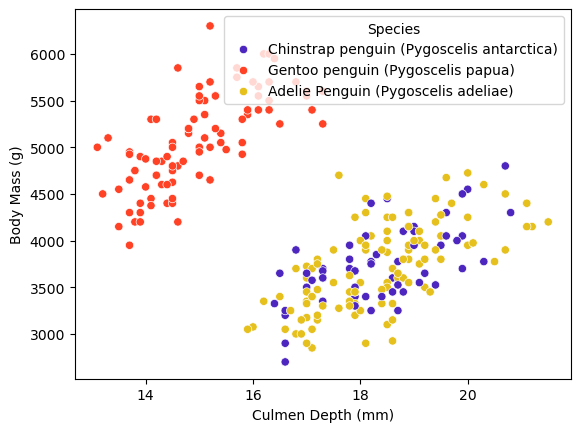

In [12]:
sns.scatterplot(train, x="Culmen Depth (mm)", y="Body Mass (g)", hue="Species", palette="CMRmap")

# Choosing Features

How will we narrow down the features that will be most helpful in constructing the most accurate model possible.


First, we'll make our modeling functions. One will be for logistic regressions and the other will be for decision tree classifiers.

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=10000)

def fit_logistic(cols, X, y):
    LR.fit(X[cols], y)
    return LR.score(X[cols], y)

We will use the ``combinations`` function from the ``itertools`` package. This will list all the combinations of one discreet variable and two continuous variables.

In [39]:
from itertools import combinations

all_qual_cols = ["Island", "Clutch Completion", "Sex"] #, "Sex"
all_quant_cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Body Mass (g)", "Flipper Length (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"] #"Flipper Length (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"

score = 0
cols_best = []

for qual in all_qual_cols:
    qual_cols = [col for col in X_train.columns if qual in col]
    for pair in combinations(all_quant_cols, 2):
        cols = qual_cols + list(pair)
        log_score = fit_logistic(cols, X_train, y_train)
        if log_score > score:
            score = log_score
            cols_best = cols

print(score)
print(cols_best)

0.99609375
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)']


Now trying cross-validation to compare the two models. We'll use the ``cross_val_score`` function from the ``sklearn.model_selection`` package. This will return an array of scores of the estimator for each run of the cross validation.

In [40]:
from sklearn.model_selection import cross_val_score

cv_scores_LR = cross_val_score(LR, X_train, y_train, cv = 5)
cv_scores_LR


array([1., 1., 1., 1., 1.])

# Discussion

Summarize findings and describe what you learned from the process of completing this post